In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

def rough_plot(in_list, num_group):
    rough_list = list()
    tmp_sum = 0
    
    for i in range(1, len(in_list)):
        tmp_sum += in_list[i]
    
        if(i%num_group == num_group-1):
            rough_list.append(tmp_sum / num_group)
            tmp_sum = 0
            
    plt.plot(rough_list)

In [3]:
import sys

def next_state(state, action, action_level):
    next_state = state.copy()
    if (action > 2*action_level) or action < 0:
        print("action = ", action)
        sys.exit("error, action undefined! nxt")

    if action >= 1 and action <= action_level:
        # then buy
        
        if state['HandCash'] > 0:
            next_state['HandCash'] = state['HandCash']*(1 - action/action_level)
            next_state['NumStock'] = state['NumStock'] + \
                                     (state['HandCash']/state['StockPrice'])*(action/action_level)

    elif action >= (action_level + 1) and action <= (action_level + action_level) :
        # then sell
        
        if state['NumStock'] > 0:
            next_state['NumStock'] = state['NumStock']*(1 - (action-action_level)/action_level)
            next_state['HandCash'] = state['HandCash'] + \
                                     (state['StockPrice']*state['NumStock'])*((action-action_level)/action_level)
    
    return next_state


def reward(state, init_invest):
    return (state['NumStock']*state['StockPrice'] + state['HandCash']) - init_invest

def my_reward(curr, last):
    return (curr['NumStock']*curr['StockPrice'] + curr['HandCash']) - \
           (last['NumStock']*last['StockPrice'] + last['HandCash'])

In [4]:


def psy(price_list):
    n = 0
    for i in range(1, len(price_list)):
        if price_list[i] > price_list[i-1]:
            n += 1
    return (n/float(len(price_list) - 1))*100


def feature_6_original(price_list,action,action_level):
    psy_num = psy(price_list)
    if(psy_num <= 25): # market oversell we can buy
        if(action <= action_level):
            return (action + action_level + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action - action_level)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)
    if(25 < psy_num < 75):#hold to observe situation
        if(action <= action_level):
            return 2*(action_level - action + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return 2*(2*action_level - action + 1)/float(2*action_level + 1)
        else:
            return 1
    if(psy_num >= 75):#market overbuy we can sell
        if(action <= action_level):
            return (action_level - action + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action + 1)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)
        
        
def feature_6_dis(price_list, action, action_level):
    psy_num = psy(price_list)
    if(psy_num <= 25): # market oversell we can buy
        if(action <= action_level):
            return (action + action_level)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(2*action_level)
        
    if(25 < psy_num < 75):#hold to observe situation
        if(action <= action_level):
            return (action_level - action)/float(action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(action_level)
        
    if(psy_num >= 75):#market overbuy we can sell
        if(action <= action_level):
            return (action_level - action)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            return (action)/float(2*action_level)
        
def feature_6_conti(price_list, action, action_level):
    psy_num = psy(price_list)
    spsy_num = psy_num/100

    if(action <= action_level):
        saction = (action_level - action)/(2*action_level) # scaled action
    else:
        saction = action/(2*action_level)
            
    return 1-abs(spsy_num-saction)

In [5]:
from random import randint

def V_value(price_list, action_level):
    v = 0
    first = 1 # flag of the frist iteration
    v_act = ''
    for action in range(0, (2*action_level + 1)):
        
        # choose feature_5_conti or feature_5_dis here!!
        curr_q = feature_6_dis(price_list, action, action_level)
        
        if first == 1:
            first = 0
            v = curr_q
            v_act = action
        elif curr_q > v:
            v = curr_q
            v_act = action
        elif curr_q == v:
            flip = randint(0, 1)
            if flip == 1:
                v = curr_q
                v_act = action
    
    # add the if statement when u want to know the effective action. don't add when u want to know the intented action
    #if v == Q_value(k_today, d_today, k_yestd, d_yestd, price_list, state, 0, w, action_level):
        #v_act = 0
        
        
    #print("[v, v_act] = ", [v, v_act])
    return [v, v_act]

##### lists of data in each folder: copy and paste into the cell below
* ../input/  
inputFolderFormat = "../input/{0}"
inputCsvList = ['QCOM.csv', 'GOOG.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
           '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', '^SSEC.csv', 
           'NSU.DE_10_5_5.csv', 'DAI.DE_10_5_5.csv', 'BMW.DE_10_5_5.csv', 
           '0050.TW.csv', '1216.TW.csv', '1301.TW.csv', '2002.TW.csv', 
           '2330.TW.csv', '2409.TW.csv', '2454.TW.csv', '1704.TW.csv']

* ../input/2001_2010/  
inputFolderFormat = "../input/2001_2010/{0}"
inputCsvList = ['QCOM.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
            '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', 
            '^SSEC.csv', 'NSU.DE.csv', 'DAI.DE.csv', 'BMW.DE.csv']  
* ../input/fall/  
inputFolderFormat = "../input/fall/{0}"  
inputCsvList = ['1314.TW.csv', '2323.TW.csv', '2349.TW.csv', 
'2353.TW.csv', '2405.TW.csv', '2409.TW.csv', '2601.TW.csv', 
'2885.TW.csv', '2888.TW.csv', '6116.TW.csv']

In [6]:
from random import randint
import math
import stockstats

inputFolderFormat = "../input/fall/{0}"  
inputCsvList = ['1314.TW.csv', '2323.TW.csv', '2349.TW.csv', 
'2353.TW.csv', '2405.TW.csv', '2409.TW.csv', '2601.TW.csv', 
'2885.TW.csv', '2888.TW.csv', '6116.TW.csv']


#relist = ['^IXIC.csv']

action_level = 3
last_rwd_func = reward
avg_point_rwd_func = my_reward

init_invest = 10000

for resource_data in inputCsvList:

    input_csv = inputFolderFormat.format(resource_data)
    qcom = pd.read_csv(input_csv)
    qclose = qcom['Close']
    qclose = qclose.fillna(method='ffill')
    qclose = qclose.tolist()
    np.isnan(qclose).any()
    
    rsirwdlist = list()
    
    fx_num = 5
    
    # initial state
    state = {'NumStock': 0, 'StockPrice': qclose[0], 'HandCash': init_invest}

    for point in range(fx_num, len(qclose)):

        # new price revealed!
        state['StockPrice'] = qclose[point]

        # prepare for the arguments passed later
        price_list = qclose[point-fx_num+1:point+1]


        # determine the next state
        act = (V_value(price_list, action_level))[1]
        #print('point = ', point, 'action = ', act)
                
        state = next_state(state, act, action_level)
        
        #print(act)
        rsirwdlist.append(state['HandCash'] + state['StockPrice']*state['NumStock'] - 10000)

    print(resource_data, last_rwd_func(state, init_invest))

1314.TW.csv -5755.638036938377
2323.TW.csv -4046.2264894681857
2349.TW.csv -8188.7582660562
2353.TW.csv -2820.371913349961
2405.TW.csv -6320.429429281453
2409.TW.csv -4310.217612726298
2601.TW.csv -8124.4180937602
2885.TW.csv -1984.6594123874693
2888.TW.csv -5802.170431431774
6116.TW.csv -6540.5553439747055


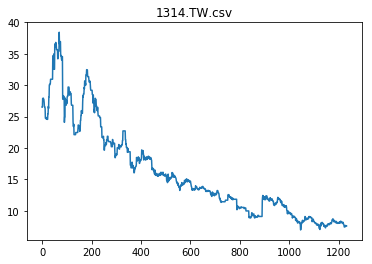

NameError: name 'kdallrwdlist' is not defined

In [7]:
for i in range(0, len(inputCsvList)):
    input_csv = inputFolderFormat.format(inputCsvList[i])
    data = pd.read_csv(input_csv)
    close = data['Close']
    close = close.fillna(method='ffill')
    close = close.tolist()
    plt.title(inputCsvList[i])
    plt.plot(close)
    plt.show()
    plt.plot(kdallrwdlist[i])
    plt.show()